# Task 2

## KNN algorithm

$\bf{Цель}$ $\bf{работы:}$ 

Научиться предобрабатывать данные для реализации алгоритмов машинного обучения.

Реализовать knn-алгоритм классификации\регрессии. 

Произвести оценку качества модели.




## Задание 3.


Имеется датасет с признаками цветов-ирисов. В последнем столбце указан сорт цветка. Необходимо произвести предобработку признаков. Произвести оценку качества работы knn алгоритма для этих данных.

-Используйте библиотеку pandas для работы с csv файлом.

-Также для простоты вычислений можно использовать библиотеку scikit-learn.

Этап 0. Разделить исходный набор данных на тренировочный и тестовый. Данные отсортированы по сорту цветка, поэтому выбор из таблицы данных для обучения и теста должен происходить случайно! (Попробуйте использовать from sklearn.model_selection import $\bf{train}$ _ $\bf{test}$ _ $\bf{split}$).

Этап 1. Нормируйте исходные данные.(Попробуйте использовать fit_transform()). Обратите внимание, что признаки необходимо нормировать и в тестовых, и в тренировочных данных.

Этап 2. Выберите k и с использованием евклидовой метрики найдите k ближайших соседей к каждому цветку тестовой выборки. Предскажите принадлежность цветка к сорту тестовой выборки.

Этап 3. Оцените качество модели с использованием метрики accuracy score и выводом матрицы ошибок.

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


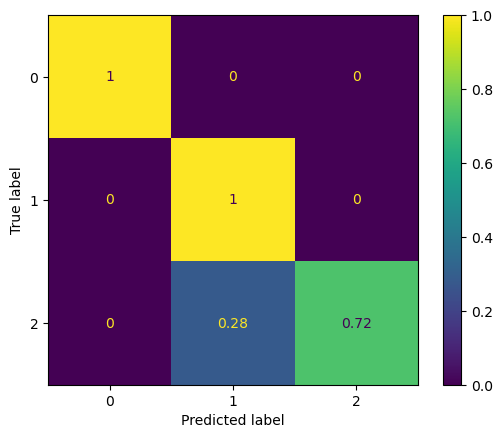

In [7]:
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()

# Read csv file
def get_data():
    x = pd.read_csv('iris.csv', sep='\t')
    header = x.columns[0].replace('"','').split(',')
    x = x['sepal.length,"sepal.width","petal.length","petal.width","variety"'].str.split(',',expand=True)
    x.columns = header
    return x

x = get_data()

#split for input and output, normalize data
# y = output dataset
# x = input dataset 
y = x['variety']
x = x.drop(['variety'], axis = 1)
# Standardize features by removing the mean and scaling to unit variance. To prepare data for estimator
# Standard normal distribution: Scaled data has zero mean and unit variance
# z = (X - mean) / standarddeviation
x = scaler.fit_transform(x)

# Segregating data into random training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.33, shuffle=True)

# train the network
k = int(input("Input k: "))
# Learning by K nearest neighbours
# For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used.
# Euclidean distance is most commonly used
# all the computation occurs when a classification or prediction is being made
# will attempt to decide the most appropriate algorithm based on the values passed to fit method.
# Default distance calculation is “minkowski”, which results in the standard Euclidean distance, default p = 2. 
# distance_pow2 = (10-14)^p + (2-7)^p + (4-11)^p + (-1-5)^p
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# prediction
y_pred = knn.predict(x_test)
score = accuracy_score(y_test, y_pred)
# confusion_matrix(y_test, y_pred)

# accuracy score
print(score)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Написать после 18


 В данной рабораторной работе было проведено обучение модели для определения правильного типа ириса. Данные были нормализованы путем вычисления среднего отклонения и отцентрированы относительно нуля. После этого была создана модель с указанием количества ближайших точек (чем больше точек, тем меньше "шума"). Далее модель получила тестовые данные и на их основе она смогла верно предсказать тип цветка в более чем 90% случаев при k = 1.